In [2]:
import os
from pymongo.mongo_client import MongoClient
from dotenv import load_dotenv
import matplotlib.pyplot as plt

In [3]:
#Setup Database
load_dotenv()
uri = os.environ['DB_URI']
client = MongoClient(uri)
db = client["rosen"]
collection = db["big_data"]

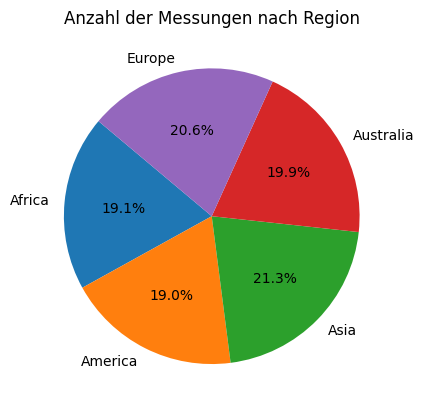

In [6]:
# Basic stats for every region
regions = collection.distinct("configuration")
region_counts = []
for region in regions:
    count = collection.count_documents({"configuration": region})
    region_counts.append(count)
    
#plt.bar(regions, region_counts)
#plt.title("Anzahl der Messungen nach Region")
#plt.show()

#pie chart looks better
plt.figure()
plt.pie(region_counts, labels=regions, autopct='%1.1f%%', startangle=140)
plt.title("Anzahl der Messungen nach Region")
plt.show()


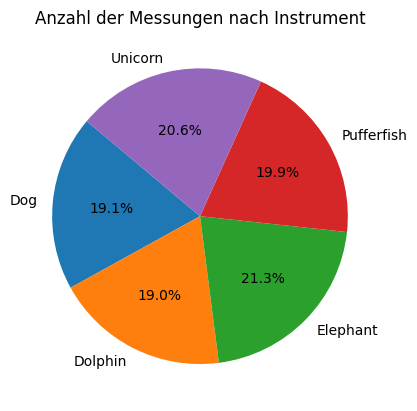

In [8]:
# Basic stats for every instrument
instruments = collection.distinct("instrument")
instrument_counts = []
for instrument in instruments:
    count = collection.count_documents({"instrument": instrument})
    instrument_counts.append(count)

#plt.bar(instruments, instrument_counts)
#plt.title("Anzahl der Messungen nach Instrument")
#plt.show()

#pie chart better
#pie chart looks better
plt.figure()
plt.pie(region_counts, labels=instruments, autopct='%1.1f%%', startangle=140)
plt.title("Anzahl der Messungen nach Instrument")
plt.show()

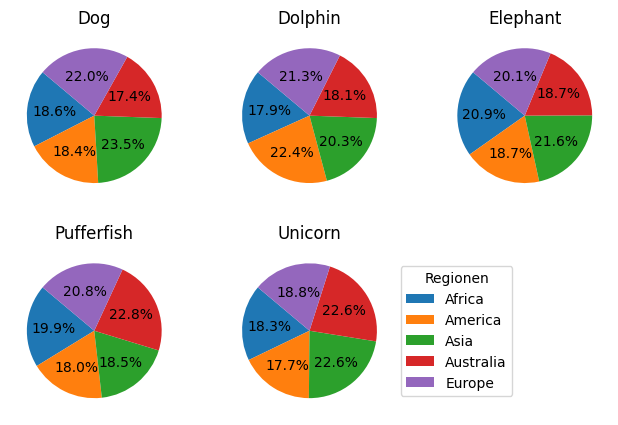

In [32]:
import math

# Basic stats for every instrument in every region
instruments = collection.distinct("instrument")
instrument_counts = []
rows = 2
cols = math.ceil(len(instruments) / rows)
fig, axes = plt.subplots(nrows=rows, ncols=cols)
regions = collection.distinct("configuration")
for index, instrument in enumerate(instruments):
    region_counts = []
    for region in regions:
        count = collection.count_documents({"configuration": region, "instrument": instrument})
        region_counts.append(count)

    row = index // cols
    col = index % cols
    ax = axes[row, col]
    wedges, texts, autotexts = ax.pie(region_counts, autopct='%1.1f%%', startangle=140)

    ax.set_title(instrument)

# Layout anpassen, um Überlappungen zu verhindern und Platz für die Legende zu machen
plt.tight_layout()

# Überflüssige Subplots entfernen, falls die Anzahl der Instrumente nicht ein Vielfaches der Spaltenanzahl ist
if len(instruments) < rows * cols:
    for idx in range(len(instruments), rows * cols):
        fig.delaxes(axes.flatten()[idx])
        
        
ax.legend(wedges, regions, title="Regionen", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

In [11]:
client.close()